Adjusted Rand Index for k=3: 0.701


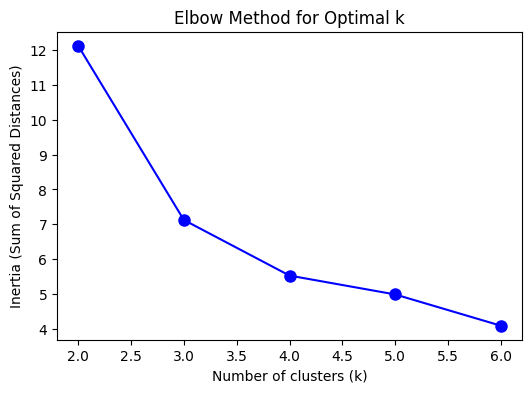

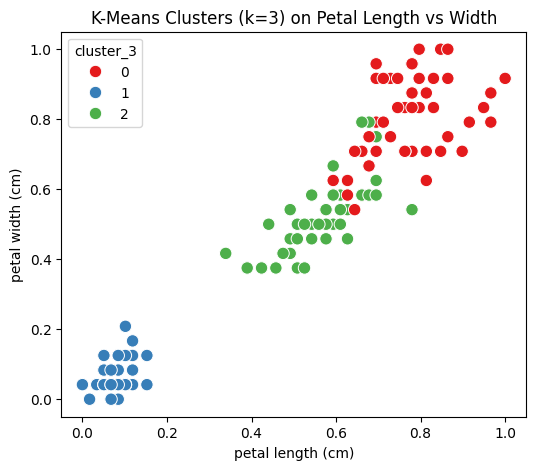

In [2]:
# clustering_iris.ipynb

# -----------------------------
# Section 1: Imports
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

# -----------------------------
# Section 2: Load preprocessed data
# -----------------------------
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Encode species for metrics
df['species_encoded'] = pd.Categorical(df['species']).codes

# Normalize features
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])

X = df_scaled[iris.feature_names].values

# -----------------------------
# Section 3: Apply K-Means (k=3)
# -----------------------------
kmeans3 = KMeans(n_clusters=3, random_state=42)
df_scaled['cluster_3'] = kmeans3.fit_predict(X)

# Compute Adjusted Rand Index
ari3 = adjusted_rand_score(df_scaled['species_encoded'], df_scaled['cluster_3'])
print(f"Adjusted Rand Index for k=3: {ari3:.3f}")

# -----------------------------
# Section 4: Experiment with k=2,4 and Elbow Curve
# -----------------------------
inertia = []
k_values = [2,3,4,5,6]

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

# Plot elbow curve
plt.figure(figsize=(6,4))
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.savefig("elbow_curve.png")
plt.show()

# -----------------------------
# Section 5: Cluster Visualization (Petal length vs width)
# -----------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='petal length (cm)', y='petal width (cm)',
    hue='cluster_3', palette='Set1',
    data=df_scaled, s=80
)
plt.title("K-Means Clusters (k=3) on Petal Length vs Width")
plt.savefig("cluster_plot.png")
plt.show()
#!/usr/bin/env python3

# Interpretation
### Preprocessing

Uses scaled features from Task 1.

Encodes species labels numerically for metrics.

### K-Means (k=3)

Fits on all four features (excluding class).

Predicts cluster labels.

Computes Adjusted Rand Index (ARI) to compare clusters with actual species.

### Elbow Method

Computes inertia for k=2,3,4,5,6 to visualize optimal number of clusters.

Saves plot as elbow_curve.png.

### Cluster Visualization

Scatter plot of petal length vs petal width, colored by predicted cluster.

Saves plot as cluster_plot.png.